In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import numpy as np
from bertopic import BERTopic
data_path = rf'C:\Users\{os.getlogin()}\PycharmProjects\NLP_project\data\abstract_2005_2020_gender_and_topic.csv'
documents_df = pd.read_csv(data_path, encoding='utf8')

In [4]:
documents_df.iloc[282]

PMID                                                                 18827122
title                       Misoprostol vaginal insert compared with dinop...
abstract                    To compare the 50-microgram (misoprostol vagin...
date                                                                10/2/2008
ncts                                                              NCT00308711
year                                                                     2008
title_and_abstract          Misoprostol vaginal insert compared with dinop...
female                                                                 1308.0
male                                                                      0.0
female_rate                                                               1.0
clean_title_and_abstract    Misoprostol vaginal insert compared with dinop...
major_topic                                                                84
topic_with_oulier_topic                                         

In [62]:
df1 = documents_df.groupby('major_topic')['female_rate'].apply(list).reset_index(name='female_rate')

In [80]:
len(df1.iloc[0]["female_rate"])

467

<AxesSubplot:xlabel='female_rate', ylabel='Count'>

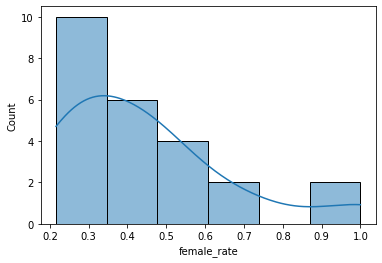

In [78]:
sns.histplot(data=df1.iloc[255], x="female_rate", kde=True)

In [5]:
import hdbscan

model_path = r"C:\Users\morfi\PycharmProjects\LDAmodeling\results\bert\bertTopic_train(81876)_n_gram_1_1_min_topic_size_50_with_probs"
loaded_model = BERTopic.load(model_path)
probs = hdbscan.all_points_membership_vectors(loaded_model.hdbscan_model)
probs = loaded_model._map_probabilities(probs, original_topics=True)

In [119]:
# check similarity 35 and 36
import json
import torch
prob_string1 = documents_df.iloc[1]["probs"]
prob_string2 = documents_df.iloc[36]["probs"]

prob1 = json.loads(prob_string1)
prob2 = json.loads(prob_string2)

In [110]:
type(prob1)

torch.Tensor

In [120]:
prob1 = torch.as_tensor(prob1)
prob1 =prob1 + 1e-21
prob2 = torch.as_tensor(prob2)
prob2 =prob2 + 1e-21

In [125]:
(torch.sum(- prob1 * torch.log(prob2)) + torch.sum(- prob2 * torch.log(prob1))).item()

25.65699005126953

In [114]:
from scipy.stats import entropy
from scipy.special import rel_entr, kl_div

print(entropy(prob1, prob2))
print(entropy(prob2, prob1))

0.04454468738140084
0.7685650554771403


In [2]:
from bertopic import BERTopic
loaded_model = BERTopic.load(rf"C:\Users\morfi\PycharmProjects\NLP_project\TopicModeling\Bert\src\bertTopic_train(81876)_n_gram_1_1_nr_topics_310")
print(f"310 is :{len(loaded_model.get_topics())}")
info_df = loaded_model.get_topic_info()
info_df

310 is :54


,Topic,Count,Name
0,-1,24478,-1_the_and_with_for
1,0,6278,0_cancer_survival_patient_with
2,1,2991,1_hiv_and_hiv1_antiretroviral
3,2,2779,2_depression_disorder_treatment_depressive
4,3,2695,3_patient_lymphoma_response_cell
5,4,2378,4_copd_asthma_exacerbation_pulmonary
6,5,2333,5_intervention_weight_physical_activity
7,6,2215,6_diet_intake_fat_insulin
8,7,2042,7_insulin_diabetes_glucose_type
9,8,1847,8_week_arthritis_rheumatoid_patient


In [188]:
docs = documents_df.clean_title_and_abstract.to_list()
topics, probs = loaded_model.transform(docs)

Batches:   0%|          | 0/681 [00:00<?, ?it/s]

In [230]:
documents_df.to_csv(rf'C:\Users\{os.getlogin()}\PycharmProjects\NLP_project\data\abstract_2005_2020_gender_and_topic.csv',
                      index=False)